In [1]:
#importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [41]:
train = pd.read_csv('train_LZdllcl.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


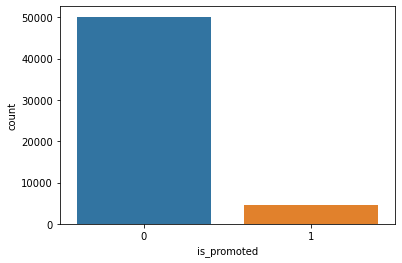

In [122]:
sns.countplot(x = 'is_promoted', data = train)

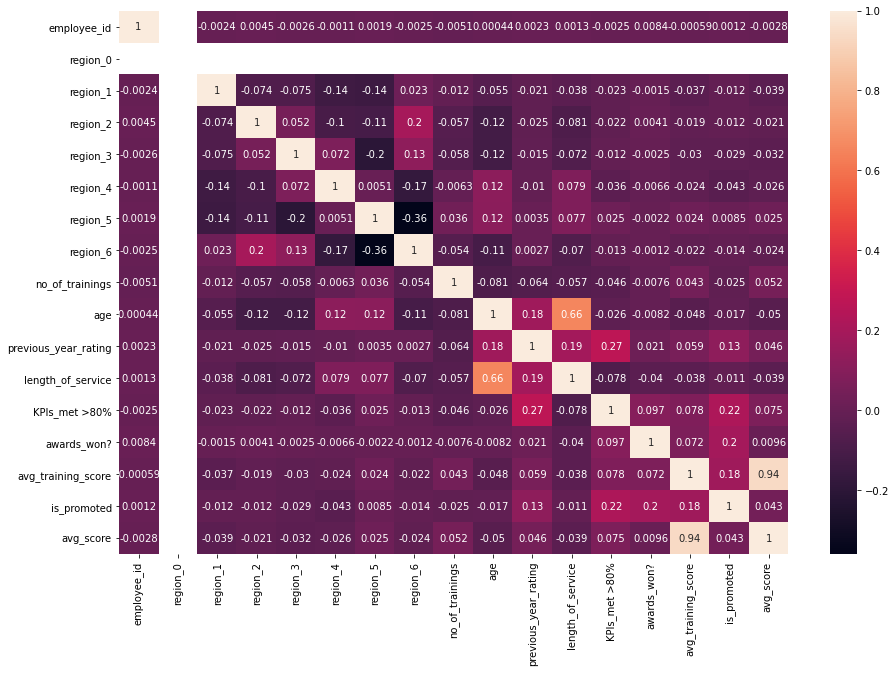

In [123]:
plt.figure(figsize = (15,10))
sns.heatmap(train.corr(),annot = True)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [43]:
train.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [45]:
avg_score = train.groupby(['department','region'])['avg_training_score'].transform('mean')
avg_score = avg_score/avg_score.mean()
train['avg_score'] = avg_score

In [46]:
train.previous_year_rating.fillna(0.0,inplace = True)

In [47]:
department = train.department.values

In [48]:
train.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [49]:
depart =  pd.get_dummies(train.department,prefix = 'depa',drop_first = True)

In [50]:
depart.head()

,depa_Finance,depa_HR,depa_Legal,depa_Operations,depa_Procurement,depa_R&D,depa_Sales & Marketing,depa_Technology
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1


In [51]:
from category_encoders.binary import BinaryEncoder

be = BinaryEncoder(cols = 'region')
train = be.fit_transform(train)

In [52]:
edu = pd.get_dummies(train.education,prefix = 'edu',drop_first = True)
gend = pd.get_dummies(train.gender,prefix = 'gend',drop_first = True)

In [53]:
edu.head(),gend.head()

(   edu_Below Secondary  edu_Master's & above
 0                    0                     1
 1                    0                     0
 2                    0                     0
 3                    0                     0
 4                    0                     0,
    gend_m
 0       0
 1       1
 2       1
 3       1
 4       1)

In [54]:
train_x = pd.concat([train,depart,edu,gend],axis = 1)

In [55]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   employee_id             54808 non-null  int64  
 1   department              54808 non-null  object 
 2   region_0                54808 non-null  int64  
 3   region_1                54808 non-null  int64  
 4   region_2                54808 non-null  int64  
 5   region_3                54808 non-null  int64  
 6   region_4                54808 non-null  int64  
 7   region_5                54808 non-null  int64  
 8   region_6                54808 non-null  int64  
 9   education               52399 non-null  object 
 10  gender                  54808 non-null  object 
 11  recruitment_channel     54808 non-null  object 
 12  no_of_trainings         54808 non-null  int64  
 13  age                     54808 non-null  int64  
 14  previous_year_rating    54808 non-null

In [56]:
train_x.drop(['department','education','gender','recruitment_channel'],axis = 1,inplace = True)
train_x

,employee_id,region_0,region_1,region_2,region_3,region_4,region_5,region_6,no_of_trainings,age,...,depa_HR,depa_Legal,depa_Operations,depa_Procurement,depa_R&D,depa_Sales & Marketing,depa_Technology,edu_Below Secondary,edu_Master's & above,gend_m
0,65438,0,0,0,0,0,0,1,1,35,...,0,0,0,0,0,1,0,0,1,0
1,65141,0,0,0,0,0,1,0,1,30,...,0,0,1,0,0,0,0,0,0,1
2,7513,0,0,0,0,0,1,1,1,34,...,0,0,0,0,0,1,0,0,0,1
3,2542,0,0,0,0,1,0,0,2,39,...,0,0,0,0,0,1,0,0,0,1
4,48945,0,0,0,0,1,0,1,1,45,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,0,0,0,1,1,1,0,1,48,...,0,0,0,0,0,0,1,0,0,1
54804,74592,0,0,1,0,1,1,1,1,37,...,0,0,1,0,0,0,0,0,1,0
54805,13918,0,0,0,1,0,0,1,1,27,...,0,0,0,0,0,0,0,0,0,1
54806,13614,0,1,0,0,0,0,1,1,29,...,0,0,0,0,0,1,0,0,0,1


In [57]:
train_x.isnull().sum()

employee_id               0
region_0                  0
region_1                  0
region_2                  0
region_3                  0
region_4                  0
region_5                  0
region_6                  0
no_of_trainings           0
age                       0
previous_year_rating      0
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
avg_score                 0
depa_Finance              0
depa_HR                   0
depa_Legal                0
depa_Operations           0
depa_Procurement          0
depa_R&D                  0
depa_Sales & Marketing    0
depa_Technology           0
edu_Below Secondary       0
edu_Master's & above      0
gend_m                    0
dtype: int64

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

y = train_x.is_promoted
X_train, X_valid, y_train, y_valid = train_test_split(train_x.drop(['is_promoted','region_0'],axis = 1), y, test_size=0.33, random_state=42, stratify = y)
scaler = StandardScaler()
df_sc = scaler.fit_transform(X_train)


In [85]:
X_train.shape

(36721, 27)

In [69]:
from sklearn.metrics import make_scorer,f1_score

def print_score(m):
    res = [f1_score(m.predict(df_sc), y_train),
           f1_score(m.predict(scaler.transform(X_valid)), y_valid),
           m.score(df_sc, y_train), m.score(scaler.transform(X_valid), y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [86]:
from xgboost.sklearn import XGBClassifier

params = {'objective': 'binary:logistic',
          'max_depth': 2,'learning_rate': 1.0,
          'silent': True,'n_estimators': 5
         }

%time model = XGBClassifier(**params).fit(df_sc, y_train)

Wall time: 179 ms


In [87]:
print_score(model)

[0.4143426294820718, 0.43873517786561267, 0.9359494567141418, 0.9371924586719743]


In [117]:
param = {'colsample_bytree': 0.9045799458309223,
          'learning_rate': 0.09113426106388132,
          'max_depth': 4,
          'min_child_weight': 4,
          'n_estimators': 795,
          'subsample': 0.7281185407840126}
%time model2 =  XGBClassifier(**param).fit(df_sc, y_train)
print_score(model2)

Wall time: 23.6 s
[0.5904550499445061, 0.5140488254260709, 0.949756270254078, 0.9416708132913142]


In [ ]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring=make_scorer(f1_score),n_jobs=-1,iid=False, cv=3)
%time tuning.fit(X_train,y_train)

[0.5904846598488217, 0.5122515025427647, 0.9498379673756161, 0.9416708132913142]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16547
           1       0.89      0.36      0.51      1540

    accuracy                           0.94     18087
   macro avg       0.92      0.68      0.74     18087
weighted avg       0.94      0.94      0.93     18087



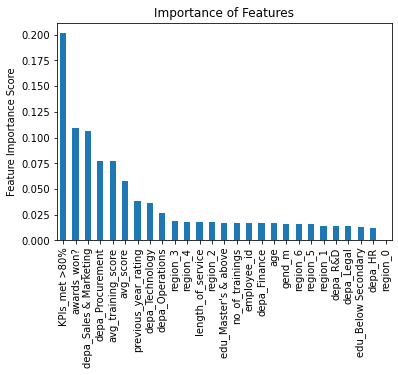

In [113]:
from sklearn.metrics import classification_report

predictors=list(train_x.drop('is_promoted',axis =1).columns)
feat_imp = pd.Series(model2.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print_score(model2)
pred=model2.predict(scaler.transform(X_valid))
print(classification_report(y_valid, pred))

In [104]:
test = pd.read_csv('test_2umaH9m.csv')
test.education.fillna("Bachelor's",inplace = True)
test.previous_year_rating.fillna(0,inplace = True)
#test.info()
# 'con_2_cat(test)
# for label,content in test.items():
#     numericalize(test,content,label)'
#test.info()
#test['imp_sum'] = test['awards_won?'] + test['KPIs_met >80%'] +test.previous_year_rating
#test['training_hours'] = test.no_of_trainings * test.avg_training_score
#test['age_joined'] = test.age - test.length_of_service
avg_score = test.groupby(['department','region'])['avg_training_score'].transform('mean')
avg_score = avg_score/avg_score.mean()
test['avg_score'] = avg_score

depart_t =  pd.get_dummies(test.department,prefix = 'depa',drop_first = True)
be = BinaryEncoder(cols = 'region')
test = be.fit_transform(test)

edu = pd.get_dummies(test.education,prefix = 'edu',drop_first = True)
gend = pd.get_dummies(test.gender,prefix = 'gend',drop_first = True)

test_x = pd.concat([test,depart_t,edu,gend],axis = 1)

test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   employee_id             23490 non-null  int64  
 1   department              23490 non-null  object 
 2   region_0                23490 non-null  int64  
 3   region_1                23490 non-null  int64  
 4   region_2                23490 non-null  int64  
 5   region_3                23490 non-null  int64  
 6   region_4                23490 non-null  int64  
 7   region_5                23490 non-null  int64  
 8   region_6                23490 non-null  int64  
 9   education               23490 non-null  object 
 10  gender                  23490 non-null  object 
 11  recruitment_channel     23490 non-null  object 
 12  no_of_trainings         23490 non-null  int64  
 13  age                     23490 non-null  int64  
 14  previous_year_rating    23490 non-null

In [105]:
test_x.drop(['department','education','gender','recruitment_channel'],axis = 1,inplace = True)
test_x.info(),train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   employee_id             23490 non-null  int64  
 1   region_0                23490 non-null  int64  
 2   region_1                23490 non-null  int64  
 3   region_2                23490 non-null  int64  
 4   region_3                23490 non-null  int64  
 5   region_4                23490 non-null  int64  
 6   region_5                23490 non-null  int64  
 7   region_6                23490 non-null  int64  
 8   no_of_trainings         23490 non-null  int64  
 9   age                     23490 non-null  int64  
 10  previous_year_rating    23490 non-null  float64
 11  length_of_service       23490 non-null  int64  
 12  KPIs_met >80%           23490 non-null  int64  
 13  awards_won?             23490 non-null  int64  
 14  avg_training_score      23490 non-null

(None, None)

In [91]:
df_sc.shape

(36721, 27)

In [106]:
test_x.employee_id.astype(int)

0         8724
1        74430
2        72255
3        38562
4        64486
         ...  
23485    53478
23486    25600
23487    45409
23488     1186
23489     5973
Name: employee_id, Length: 23490, dtype: int32

In [118]:
test_sc = scaler.transform(test_x.drop('region_0',axis = 1))


test_result = pd.DataFrame({'employee_id':test_x.employee_id.astype(int),
                           'is_promoted':model2.predict(test_sc)})


In [119]:
test_result.set_index('employee_id',inplace = True)

test_result.head()

,is_promoted
employee_id,
8724,0
74430,0
72255,0
38562,0
64486,0


In [120]:
test_result.is_promoted.value_counts()

0    22727
1      763
Name: is_promoted, dtype: int64

In [121]:
test_result.to_csv('second_25.csv')